# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Dataset Beverage Sales

####About Dataset
This dataset was created to simulate realistic sales patterns in the beverage industry, highlighting important factors like regional preferences, seasonal fluctuations, and customer segmentation. It features both Business-to-Business (B2B) and Business-to-Consumer (B2C) transactions, making it adaptable for a variety of analytical purposes.

Feedback, questions, and suggestions are always welcome—feel free to share your thoughts to help improve this dataset!

- **Order_ID** Unique identifier for each order. Groups multiple products within the same order.
- **Customer_ID** Unique identifier for each customer, distinguishing individual buyers.
- **Customer_Type** Indicates whether the customer is B2B (business-to-business) or B2C (business-to-consumer).
- **Product** The name of the product purchased, such as "Coca-Cola" or "Erdinger Weißbier".
- **Category** The product category, such as "Soft Drinks" or "Alcoholic Beverages".
- **Unit_Price** The price per unit of the product.
- **Quantity** The number of units purchased for the specified product in the order.
- **Discount** The discount applied to the product (e.g., 0.1 for 10%). Discounts are only given to B2B customers.
- **Total_Price** The total price for the product after applying discounts.
- **Region** The region of the customer, such as "Bayern" or "Berlin".
- **Order_Date** The date when the order was placed.

Link dataset [Kaggle](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/synthetic_beverage_sales_data.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [ ]:
print(f"Dataset Shape: {df.shape} (rows, columns)")

Dataset Shape: (8999910, 11) (rows, columns)


Mengecilkan ukuran data

In [ ]:
df_sample = df.sample(n=80000, random_state=42, ignore_index=True)
print(f"Sample Shape: {df_sample.shape}")

Sample Shape: (80000, 11)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       80000 non-null  object 
 1   Customer_ID    80000 non-null  object 
 2   Customer_Type  80000 non-null  object 
 3   Product        80000 non-null  object 
 4   Category       80000 non-null  object 
 5   Unit_Price     80000 non-null  float64
 6   Quantity       80000 non-null  int64  
 7   Discount       80000 non-null  float64
 8   Total_Price    80000 non-null  float64
 9   Region         80000 non-null  object 
 10  Order_Date     80000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.7+ MB


In [ ]:
missing_values = df_sample.isnull().sum()
missing_values

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [ ]:
df_sample.describe(include='all')

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,80000,80000,80000,80000,80000,80000.000000,80000.000000,80000.000000,80000.000000,80000,80000
unique,79009,9998,2,47,4,NaN,NaN,NaN,NaN,16,1094
top,ORD1004109,CUS7748,B2C,Hohes C Orange,Alcoholic Beverages,NaN,NaN,NaN,NaN,Hamburg,2023-09-01
freq,3,21,51493,3052,20083,NaN,NaN,NaN,NaN,5429,105
mean,NaN,NaN,NaN,NaN,NaN,5.834102,23.141275,0.029756,131.213356,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.760223,26.900519,0.044799,510.364382,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.320000,1.000000,0.000000,0.310000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.050000,6.000000,0.000000,8.380000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.750000,11.000000,0.000000,21.060000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.200000,30.000000,0.050000,70.020000,NaN,NaN


In [ ]:
numerical_columns = df_sample.select_dtypes(include=['number']).columns

Matriks korelasi kolom numerik

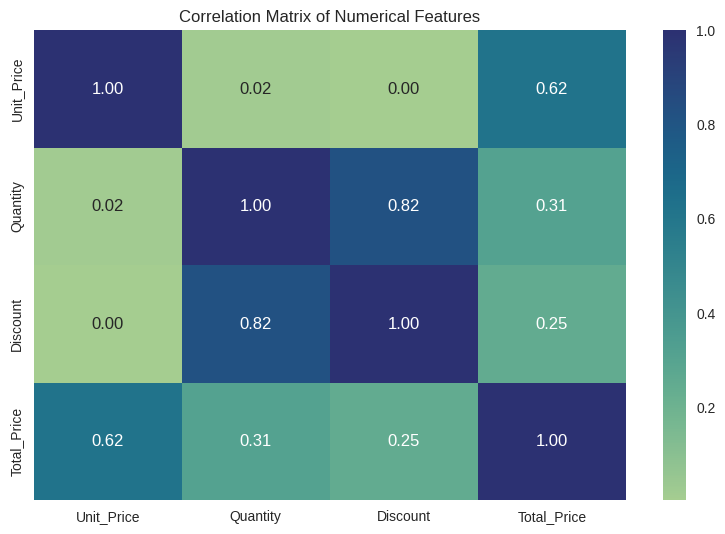

In [ ]:
corr_matrix = df_sample[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

Distribusi data numerik

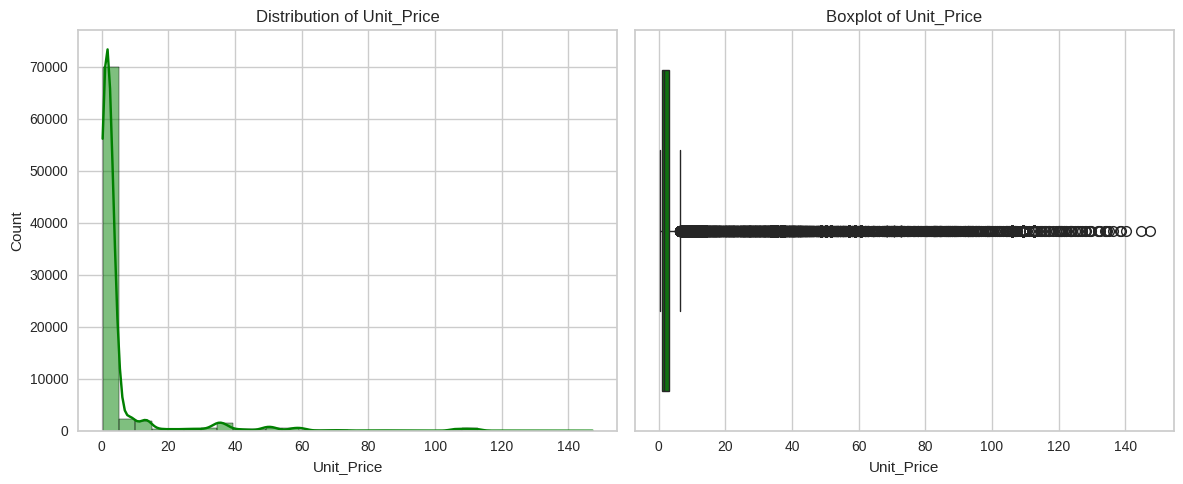

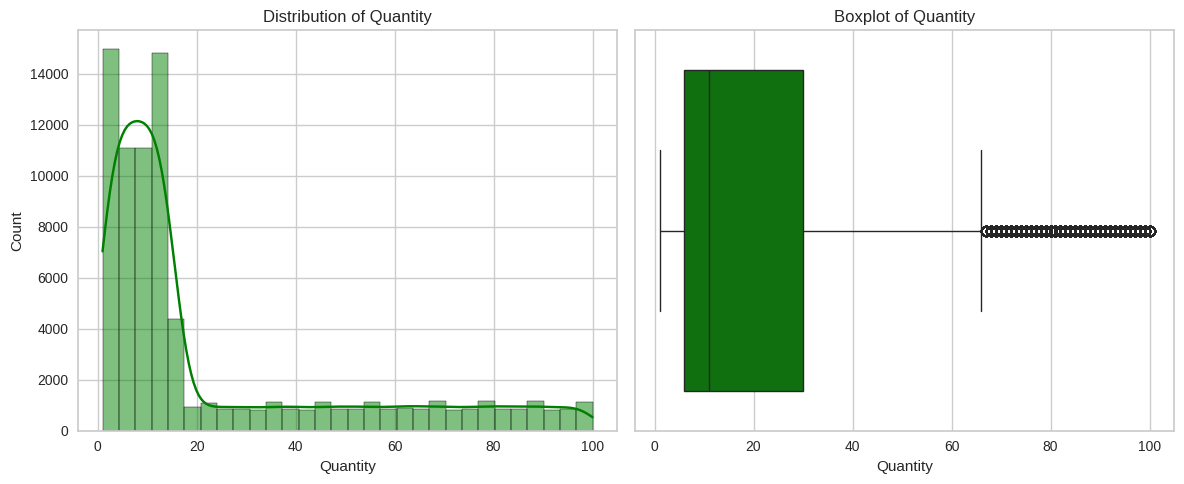

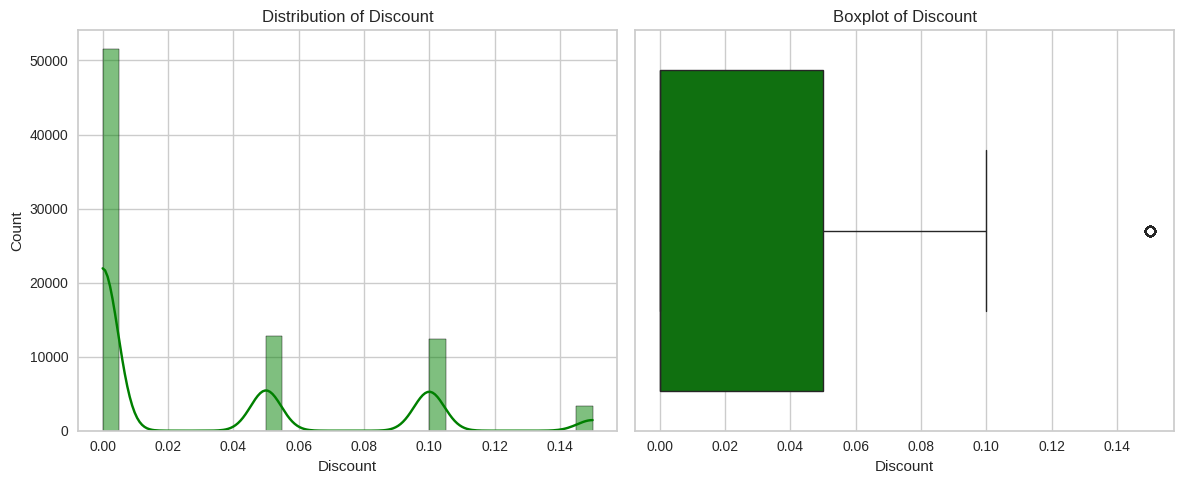

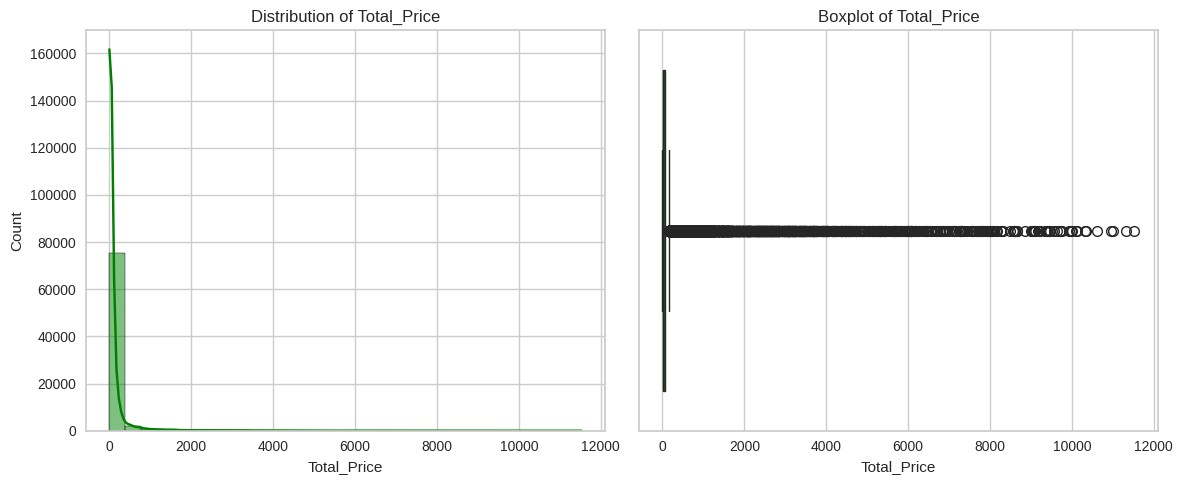

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_sample[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_sample[col], color='green')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
categorical_columns = ['Category', 'Customer_Type', 'Product', 'Region']

Distribusi data kategorikal

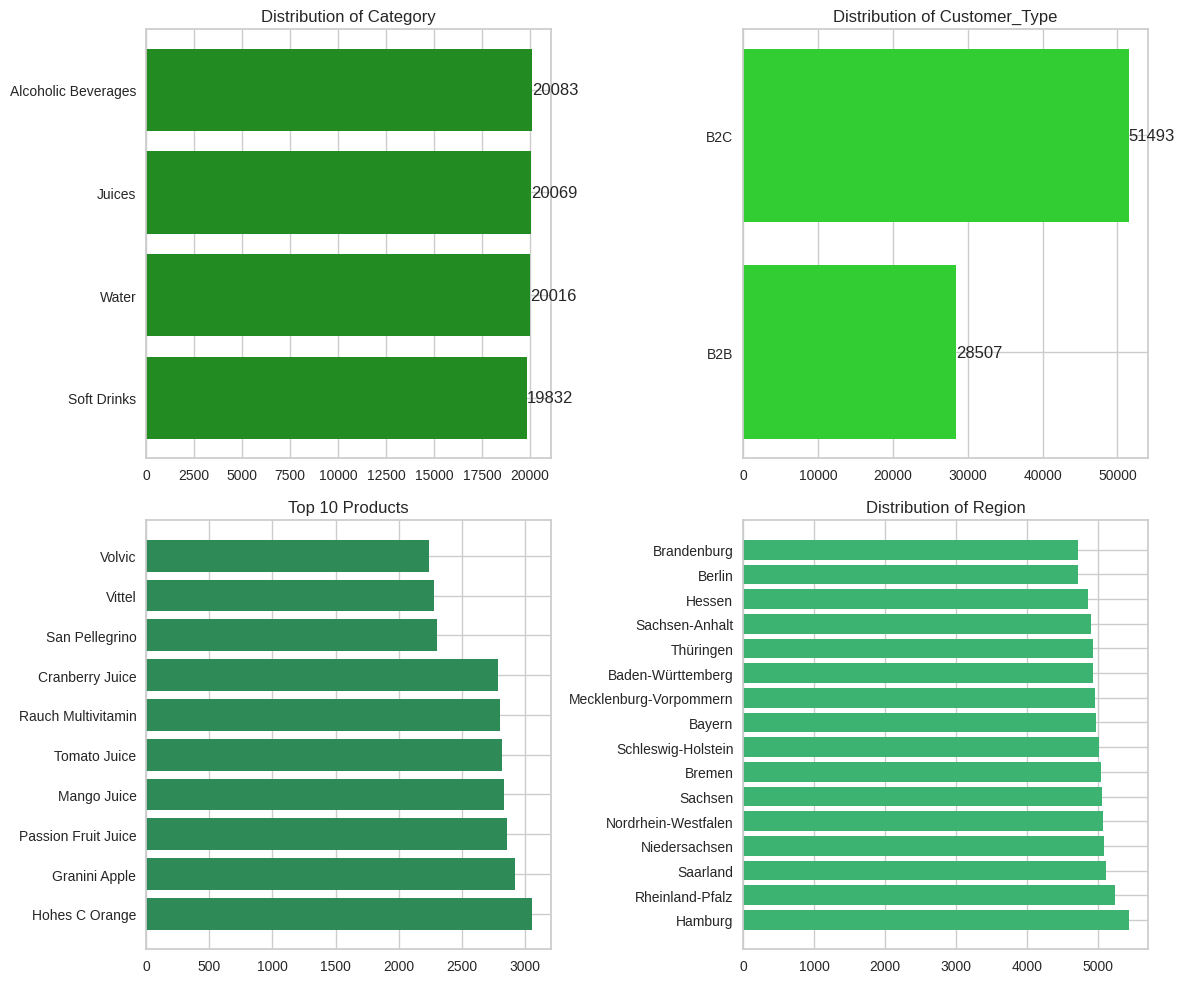

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Kolom Category
category_counts = df_sample['Category'].value_counts().sort_values(ascending=True)
axes[0, 0].barh(category_counts.index, category_counts.values, color='forestgreen')
axes[0, 0].set_title('Distribution of Category')
for i, v in enumerate(category_counts.values):
    axes[0, 0].text(v + 5, i, str(v), va='center')

# Kolom Customer_Type
customer_type_counts = df_sample['Customer_Type'].value_counts().sort_values(ascending=True)
axes[0, 1].barh(customer_type_counts.index, customer_type_counts.values, color='limegreen')
axes[0, 1].set_title('Distribution of Customer_Type')
for i, v in enumerate(customer_type_counts.values):
    axes[0, 1].text(v + 5, i, str(v), va='center')

# Kolom Product
product_counts = df_sample['Product'].value_counts().head(10)
axes[1, 0].barh(product_counts.index, product_counts.values, color='seagreen')
axes[1, 0].set_title('Top 10 Products')

# Kolom Region
region_counts = df_sample['Region'].value_counts()
axes[1, 1].barh(region_counts.index, region_counts.values, color='mediumseagreen')
axes[1, 1].set_title('Distribution of Region')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Cek duplikasi

In [ ]:
duplicate_count = df_sample.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Normalisasi & Standardisasi

In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
df_scaled = df_sample.copy()

In [ ]:
df_scaled[['Quantity']] = min_max_scaler.fit_transform(df_sample[['Quantity']])

df_scaled[['Unit_Price', 'Total_Price']] = standard_scaler.fit_transform(df_sample[['Unit_Price', 'Total_Price']])

df_scaled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,-0.268568,0.737374,0.10,-0.013076,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,-0.268568,0.171717,0.05,-0.194438,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,0.420450,0.707071,0.15,1.166618,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,4.002397,0.909091,0.10,10.159308,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,-0.284151,0.030303,0.00,-0.244245,Sachsen,2022-10-16


Cek outlier

In [ ]:
Q1 = df_scaled[numerical_columns].quantile(0.25)
Q3 = df_scaled[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

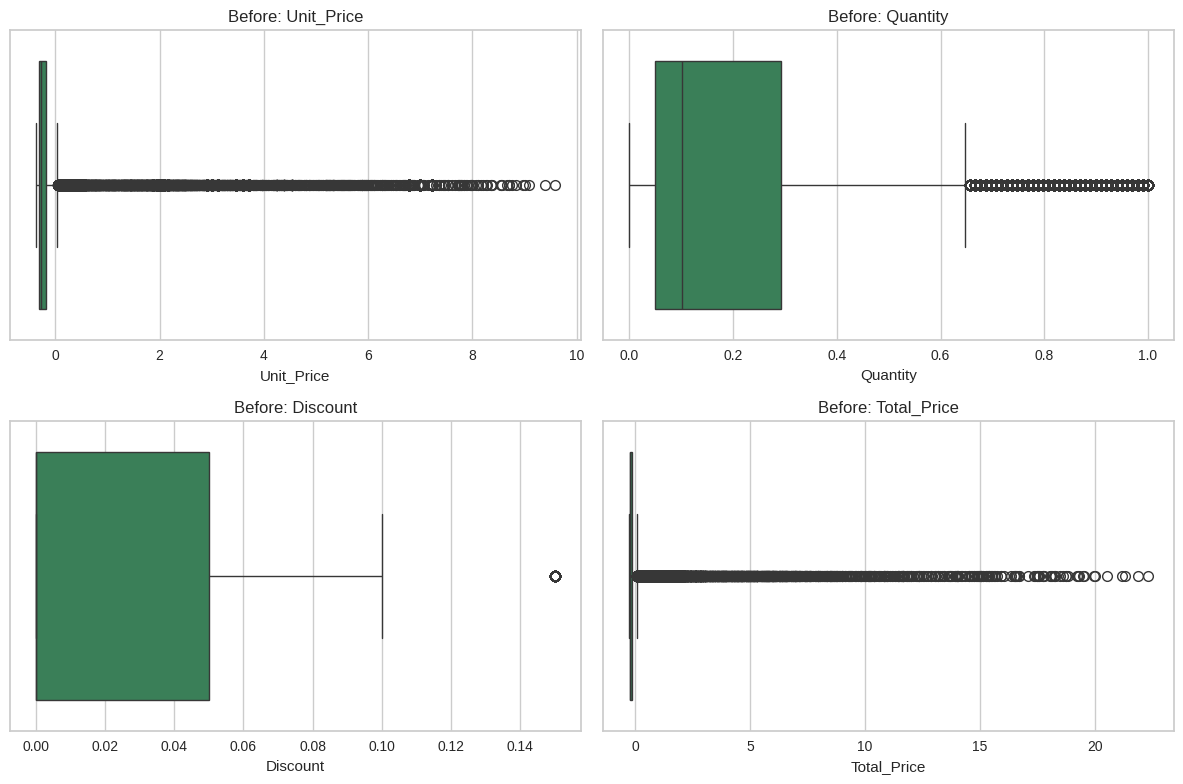

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_scaled[col], color='seagreen')
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

Hapus outlier

In [ ]:
mask = ~((df_scaled[numerical_columns] < lower_bound) | (df_scaled[numerical_columns] > upper_bound)).any(axis=1)
df_no_outliers = df_scaled[mask].reset_index(drop=True)

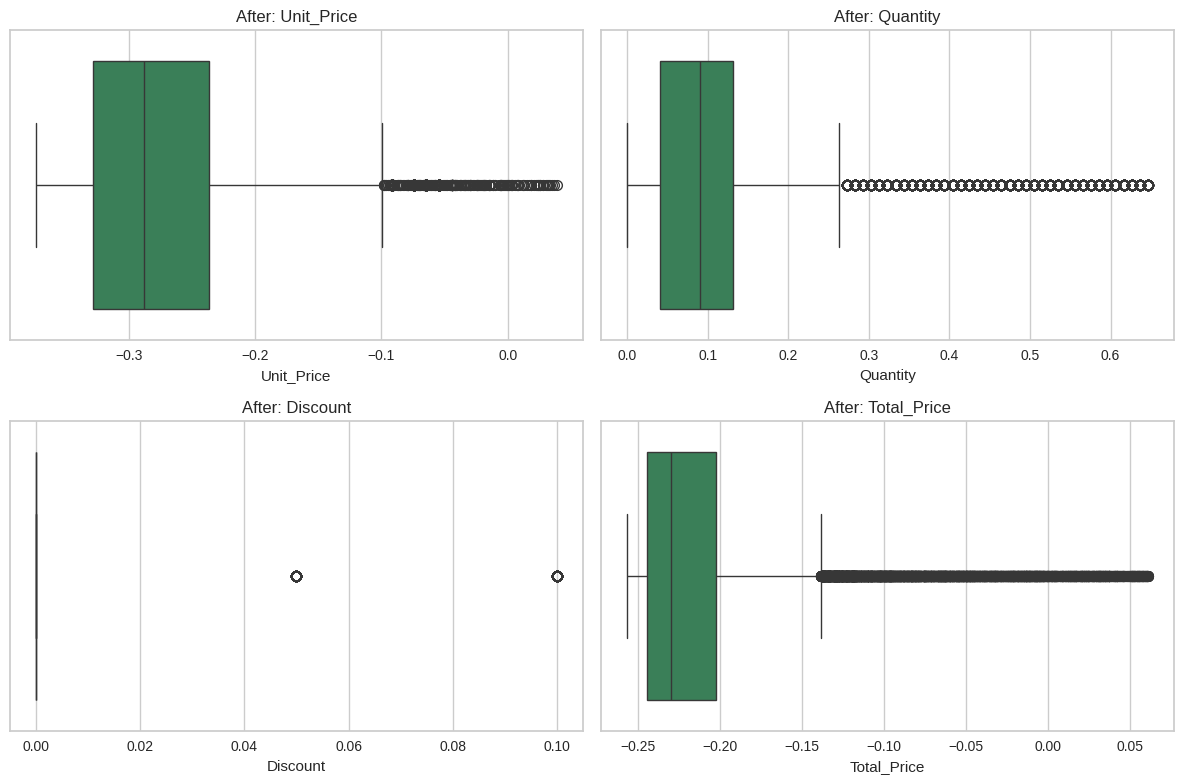

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_no_outliers[col], color='seagreen')
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

In [ ]:
df_encoded = df_no_outliers.copy()

In [ ]:
label_encoder = LabelEncoder()

Label encoding beberapa kolom

In [ ]:
df_encoded[['Category', 'Region', 'Product']] = df_no_outliers[['Category', 'Region', 'Product']].apply(
    lambda x: label_encoder.fit_transform(x))

df_encoded = pd.get_dummies(df_encoded, columns=['Customer_Type'])

df_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD1999010,CUS141,10,2,-0.268568,0.171717,0.05,-0.194438,4,2021-05-13,True,False
1,ORD2300591,CUS6160,12,1,-0.284151,0.030303,0.00,-0.244245,12,2022-10-16,False,True
2,ORD2638652,CUS4386,23,2,-0.277376,0.040404,0.00,-0.240052,8,2023-08-13,False,True
3,ORD803183,CUS7916,13,1,-0.273311,0.141414,0.00,-0.204195,11,2022-10-06,False,True
4,ORD1669739,CUS3794,35,3,-0.328866,0.050505,0.05,-0.246146,8,2021-09-20,True,False


Pemilihan fitur fitur

In [ ]:
features = ['Category','Unit_Price', 'Quantity', 'Discount', 'Total_Price',
            'Customer_Type_B2B', 'Customer_Type_B2C']

X = df_encoded[features]
print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (60368, 7)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Model awal

In [ ]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(X)
df_clustered = X.copy()
df_clustered['Cluster'] = clusters

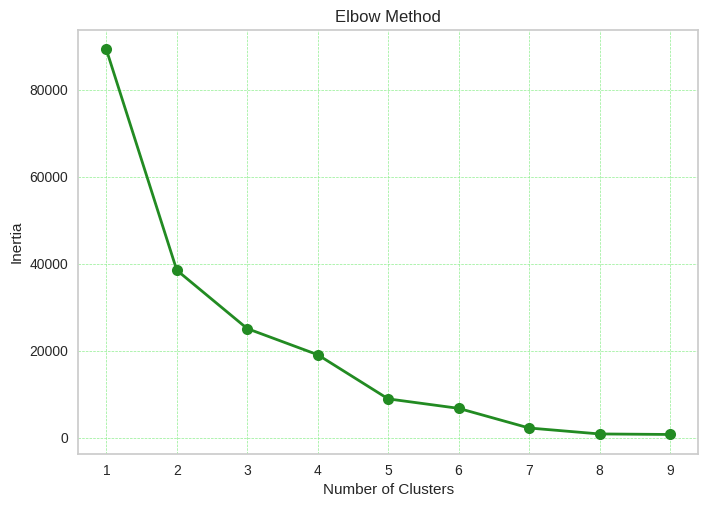

In [ ]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o', color='forestgreen', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(color='lightgreen', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"For n_clusters = {n}, The average silhouette_score is: {silhouette_avg}")

For n_clusters = 3, The average silhouette_score is: 0.8575347949038382


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Model elbow method

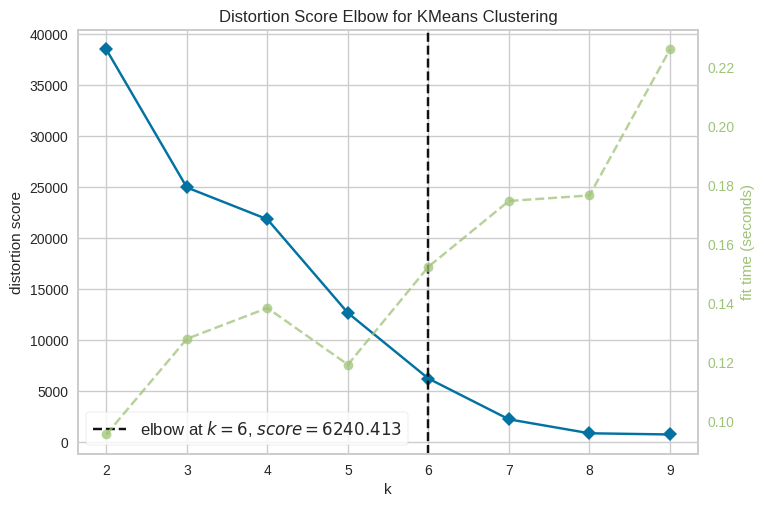

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [ ]:
optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 6


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=np.int64(6), random_state=42)

In [ ]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.7484


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
X = df_encoded[features]

Model feature selection menggunakan SelectKBest

In [ ]:
k_features = 5
init_kmeans = KMeans(n_clusters=6, random_state=42)
init_clusters = init_kmeans.fit_predict(X)

In [ ]:
selector = SelectKBest(f_classif, k=k_features)
selector.fit(X, init_clusters)
X_selected = selector.transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
selected_features_idx = selector.get_support(indices=True)
if hasattr(X, 'columns'):
    selected_features = X.columns[selected_features_idx]
    print("Selected features:", selected_features.tolist())
else:
    print("Selected feature indices:", selected_features_idx)

Selected features: ['Category', 'Quantity', 'Discount', 'Customer_Type_B2B', 'Customer_Type_B2C']


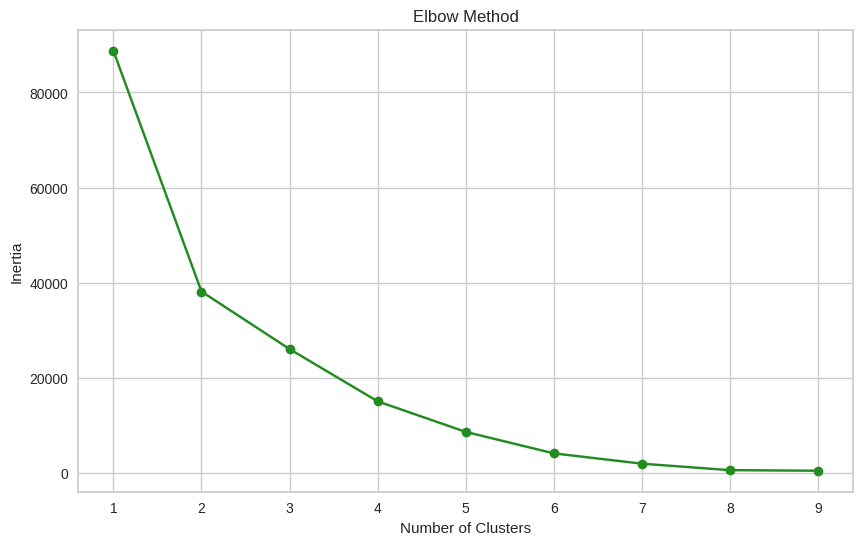

In [ ]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', color='forestgreen')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
n = 6
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(X_selected)

Membuat dataframe untuk data yang telah dikelompokkan

In [ ]:
df_clustered = X.copy() if hasattr(X, 'copy') else np.copy(X)
if hasattr(df_clustered, 'assign'):
    df_clustered = df_clustered.assign(Cluster=clusters)
else:
    df_clustered = np.column_stack((df_clustered, clusters))

In [ ]:
silhouette_avg_selection = silhouette_score(X_selected, kmeans.labels_)
if 'silhouette_avg' in locals() or 'silhouette_avg' in globals():
    print("Model sebelum feature selection:", silhouette_avg)
print("Model setelah feature selection SelectKBest:", silhouette_avg_selection)

Model sebelum feature selection: 0.7483565292657507
Model setelah feature selection SelectKBest: 0.8570913307574234


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

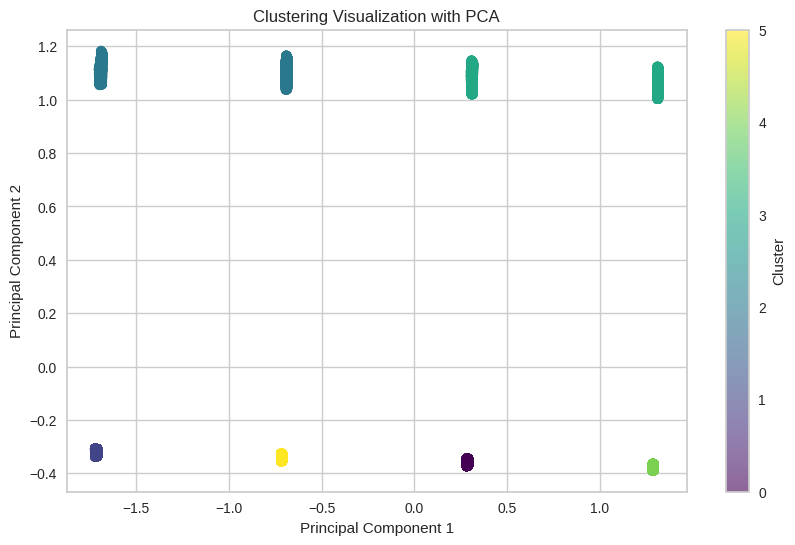

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1],
                     c=clusters, cmap='viridis', alpha=0.6)
plt.title("Clustering Visualization with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Menambahkan hasil clustering ke dalam data setelah outlier diatasi
df_labeled = df_no_outliers.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,-0.268568,0.171717,0.05,-0.194438,Bremen,2021-05-13,3
1,ORD2300591,CUS6160,B2C,Granini Apple,Juices,-0.284151,0.030303,0.00,-0.244245,Sachsen,2022-10-16,5
2,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,-0.277376,0.040404,0.00,-0.240052,Niedersachsen,2023-08-13,0
3,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,-0.273311,0.141414,0.00,-0.204195,Saarland,2022-10-06,5
4,ORD1669739,CUS3794,B2B,Vio Wasser,Water,-0.328866,0.050505,0.05,-0.246146,Niedersachsen,2021-09-20,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Mengembalikan nilai data numerik ke skala asli
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Unit_Price', 'Total_Price']] = standard_scaler.inverse_transform(df_labeled[['Unit_Price', 'Total_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18.0,0.05,31.98,Bremen,2021-05-13,3
1,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4.0,0.00,6.56,Sachsen,2022-10-16,5
2,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5.0,0.00,8.70,Niedersachsen,2023-08-13,0
3,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15.0,0.00,27.00,Saarland,2022-10-06,5
4,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6.0,0.05,5.59,Niedersachsen,2021-09-20,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster
4    12910
5    12852
0    12807
3     8673
1     6957
2     6169
Name: count, dtype: int64 



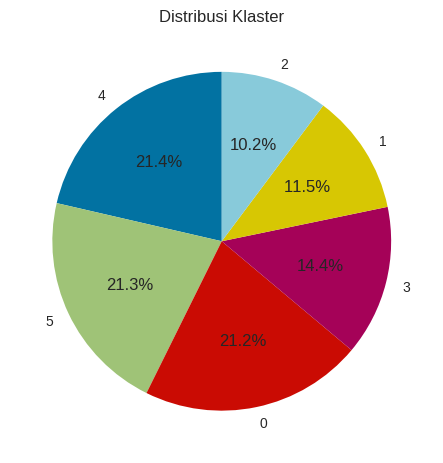

In [ ]:
# Menghitung jumlah sampel dalam setiap klaster
jumlah_per_klaster = df_labeled['Cluster'].value_counts()
print(jumlah_per_klaster, '\n')

# Membuat visualisasi distribusi klaster
plt.pie(jumlah_per_klaster, labels=jumlah_per_klaster.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Klaster')
plt.show()

Customer_Type   B2B    B2C
Cluster                   
0                 0  12807
1                 0   6957
2              6169      0
3              8673      0
4                 0  12910
5                 0  12852 



<Figure size 1000x700 with 0 Axes>

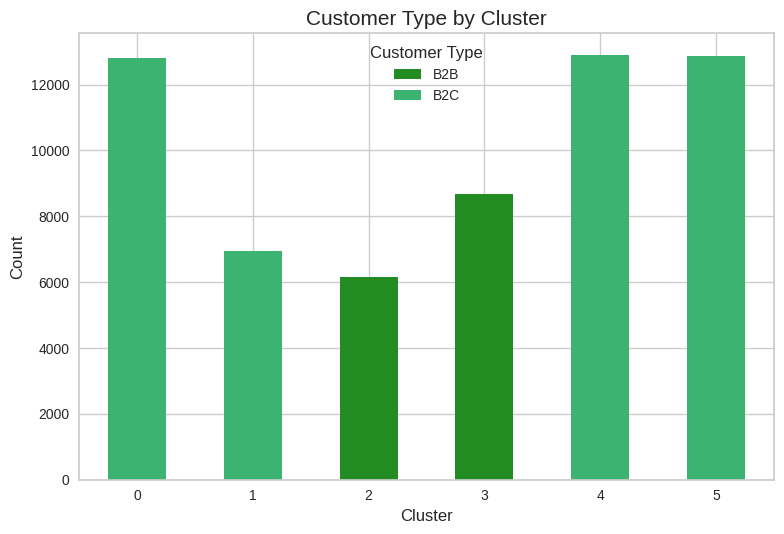

In [ ]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' lalu hitung jumlah datanya
customer_type_and_cluster_counts = df_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)

# Tampilkan jumlah data per jenis pelanggan dalam setiap klaster
print(customer_type_and_cluster_counts, '\n')

# Visualisasi diagram batang
plt.figure(figsize=(10, 7))
customer_type_and_cluster_counts.plot(kind='bar',
                                      stacked=True,
                                      color=['forestgreen', 'mediumseagreen'])
plt.title('Customer Type by Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Customer Type', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung rata-rata, median, dan modus setiap fitur numerik berdasarkan klaster
mean_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()
median_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').median()
mode_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').agg(lambda x: x.mode().iloc[0])

# Menampilkan hasil
print("Mean Values:\n", mean_values, '\n')
print("Median Values:\n", median_values, '\n')
print("Mode Values:\n", mode_values, '\n')

Mean Values:
          Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          1.598846   7.962130  0.000000    12.733398
1          2.344414   7.975995  0.000000    18.806418
2          2.215302  30.629762  0.066972    61.586356
3          1.132569  32.480111  0.067514    35.215459
4          0.986734   7.998296  0.000000     7.889834
5          2.689367   8.000778  0.000000    21.534249 

Median Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                             
0              1.49       8.0      0.00        10.16
1              1.63       8.0      0.00        13.44
2              2.11      30.0      0.05        54.91
3              0.90      32.0      0.05        26.55
4              0.96       8.0      0.00         6.60
5              3.02       8.0      0.00        19.80 

Mode Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                    

## Cluster 0 - Kelompok Pembeli Perorangan dengan Harga Menengah

- **Jumlah**: 12,807 pembeli
- **Harga Produk**: Rata-rata 1.60 per unit
- **Jumlah Pembelian**: Rata-rata 8 unit per transaksi
- **Diskon**: Tidak mendapatkan diskon (0%)
- **Total Belanja**: Sekitar Rp12.73 per transaksi
- **Tipe**: Semuanya pembeli individual (B2C)
- **Saran Strategi**: Program apresiasi untuk pelanggan loyal, Pengembangan produk berdasarkan masukan pelanggan.



## Cluster 1 - Kelompok Pembeli Perorangan Premium

- **Jumlah**: 6,957 pembeli
- **Harga Produk**: Rata-rata 2.34 per unit
- **Jumlah Pembelian**: Rata-rata 8 unit per transaksi
- **Diskon**: Tidak mendapatkan diskon (0%)
- **Total Belanja**: Sekitar 18.81 per transaksi
- **Tipe**: Semuanya pembeli individual (B2C)
- **Saran strategi**: Program diskon untuk meningkatkan ukuran pembelian



## Cluster 2 - Kelompok Pembeli Bisnis dengan Nilai Transaksi Tinggi

- **Jumlah**: 6.169 pembeli
- **Harga Produk**: Rata-rata 2.22 per unit
- **Jumlah Pembelian**: Rata-rata 31 unit per transaksi
- **Diskon**: Mendapatkan diskon 6.7%
- **Total Belanja**: Sekitar 61.58 per transaksi
- **Tipe**: Semuanya bisnis (B2B)
- **Saran strategi**: Program kemitraan B2B, Kontrak jangka panjang dengan harga khusus, Layanan dukungan bisnis prioritas.
 Cross-selling produk kategori premium, Penawaran khusus produk edisi terbatas atau seasonal



## Cluster 3 - Kelompok Pembeli Bisnis Volume Besar

- **Jumlah**: 8,673 pembeli
- **Harga Produk**: Rata-rata 1.13 per unit
- **Jumlah Pembelian**: Rata-rata 32 unit per transaksi
- **Diskon**: Mendapatkan diskon 6.75%
- **Total Belanja**: Sekitar 35.22 per transaksi
- **Tipe**: Semuanya bisnis (B2B)
- **Saran strategi**: Tawaran kontrak kerjasama jangka panjang dengan harga spesial, Diskon volume pembelian besar, Layanan khusus dan dukungan teknis untuk bisnis



## Cluster 4 - Kelompok Pembeli Ekonomis

- **Jumlah**: 12.910 pembeli
- **Harga Produk**: Rata-rata 0.99 per unit
- **Jumlah Pembelian**: Rata-rata 8 unit per transaksi
- **Diskon**: Tidak mendapatkan diskon (0%)
- **Total Belanja**: Sekitar 7.89 per transaksi
- **Tipe**: Semua adalah pembeli individual (B2C)
- **Saran strategi**: Promosi "value for money", Program penghargaan untuk frekuensi pembelian, Penawaran produk dengan harga terjangkau.



## Cluster 5 - Kelompok Pembeli Premium Tinggi

- **Jumlah**: 12.852 pembeli
- **Harga Produk**: Rata-rata 2.69 per unit
- **Jumlah Pembelian**: Rata-rata 8 unit per transaksi
- **Diskon**: Tidak mendapatkan diskon (0%)
- **Total Belanja**: Sekitar 21.53 per transaksi
- **Tipe**: Semuanya pembeli individual (B2C)
- **Saran strategi**: Buat grup atau komunitas untuk meningkatkan rasa memiliki pelanggan terhadap brand, Penawaran produk eksklusif dan limited edition, Program loyalitas tier premium

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_labeled.to_csv('Dataset_clustering.csv', index=False)